<a href="https://colab.research.google.com/github/Abdell001/Predicting-the-Mnist-dataset-with-custom-built-neural-networks/blob/master/S_%26_P_500_analysis_for_google_stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 

from pandas_datareader.data import DataReader


from datetime import datetime

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [5]:
df = pd.read_csv('GOOGL_data.csv')
print(df.shape)
df.head()

(1259, 7)


,date,open,high,low,close,volume,Name
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


In [6]:
#Adding a new year column
df['year'] = pd.DatetimeIndex(df['date']).year

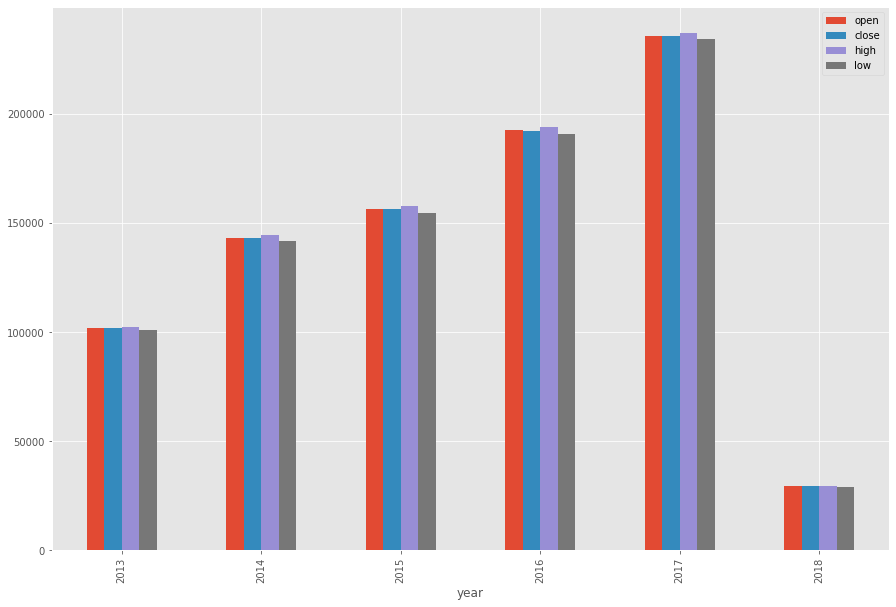

In [7]:
#visualizing yearly based on open, close, high and low stocks MAX
tempdf = df.groupby('year', as_index = False).sum()
tempdf.plot('year', ['open', 'close', 'high', 'low'], kind = 'bar')

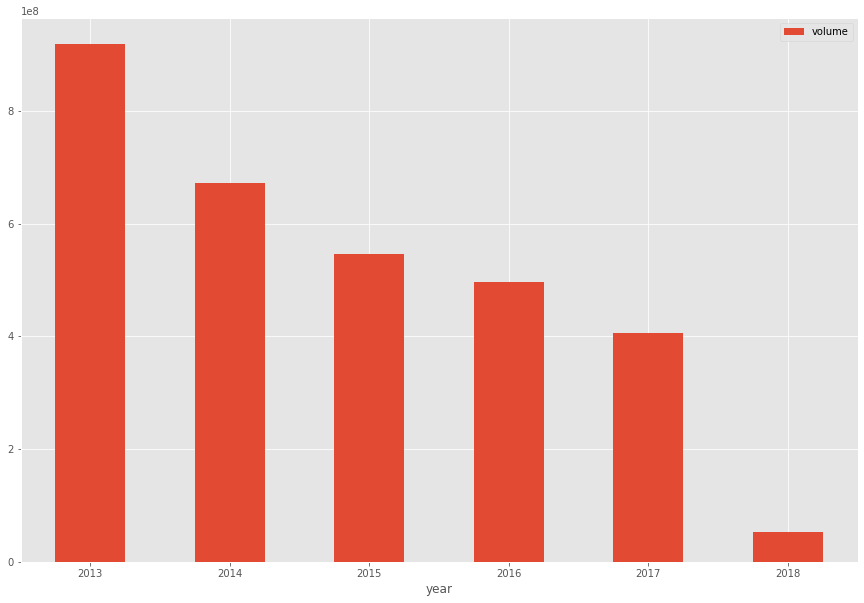

In [8]:
#visualizing the amount of stocks sold over year
x = df.groupby('year').sum().sort_values('volume', ascending = False)
x.plot.bar(y = 'volume', rot = 0)

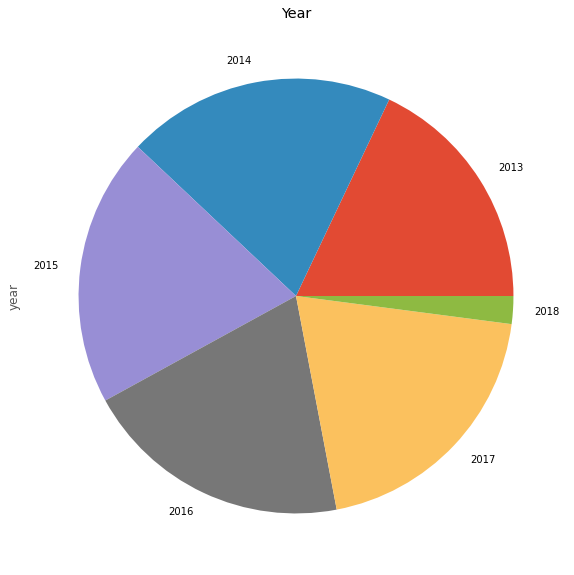

In [9]:
#visualizing the amount of data each year
df.groupby('year')['year'].agg('count').plot(kind='pie', title='Year')

In [10]:
newDf = df[(df.year==2013)]
newDf.volume.sum()
s = df.year.value_counts()
x = s.to_dict()
x

{2013: 226, 2014: 252, 2015: 252, 2016: 252, 2017: 251, 2018: 26}

In [11]:
def yearlyAllocatedData(years_dict,totalSize):
    allocation = []
    for i in years_dict:
        allocation.append((100 * years_dict[i] / totalSize))
        return allocation

In [12]:
print(yearlyAllocatedData(x,len(df)))

[20.015885623510723]


In [13]:
#filtering 2018 data since there is less data for that year
df = df[df['year'] != 2018]
df

,date,open,high,low,close,volume,Name,year
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL,2013
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL,2013
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL,2013
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL,2013
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL,2013
...,...,...,...,...,...,...,...,...
1228,2017-12-22,1070.0000,1071.7200,1067.6400,1068.8600,889446,GOOGL,2017
1229,2017-12-26,1068.6400,1068.8600,1058.6400,1065.8500,918767,GOOGL,2017
1230,2017-12-27,1066.6000,1068.2700,1058.3800,1060.2000,1116203,GOOGL,2017
1231,2017-12-28,1062.2500,1064.8400,1053.3800,1055.9500,994249,GOOGL,2017


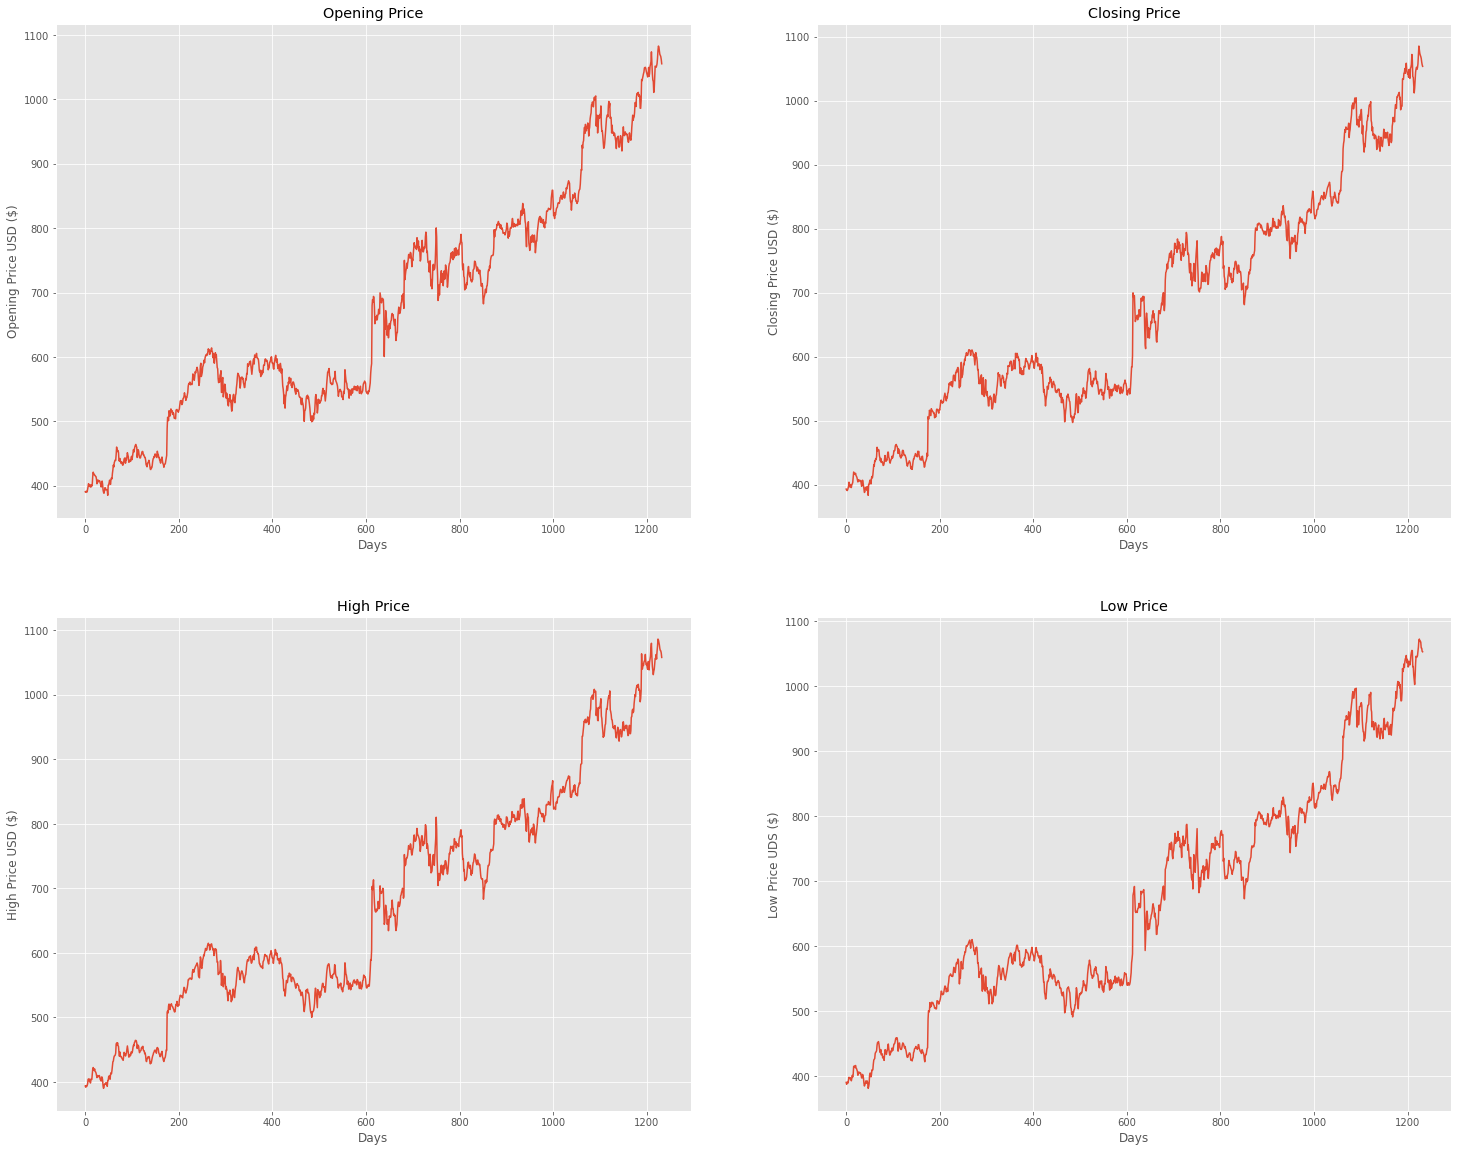

In [14]:
#graphical visualization of open, close, high and low stocks over days
fig = plt.figure(figsize=(25,20))

#visualizing the opening prices of the data
plt.subplot(2,2,1)
plt.title('Opening Price')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])

#visualizing the closing prices of the data
plt.subplot(2,2,2)
plt.title('Closing Price')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])

#visualizing the high prices of the data
plt.subplot(2,2,3)
plt.title('High Price')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])

#visualizing the low prices of the data
plt.subplot(2,2,4)
plt.title('Low Price')
plt.xlabel('Days')
plt.ylabel('Low Price UDS ($)')
plt.plot(df['low'])

plt.show()

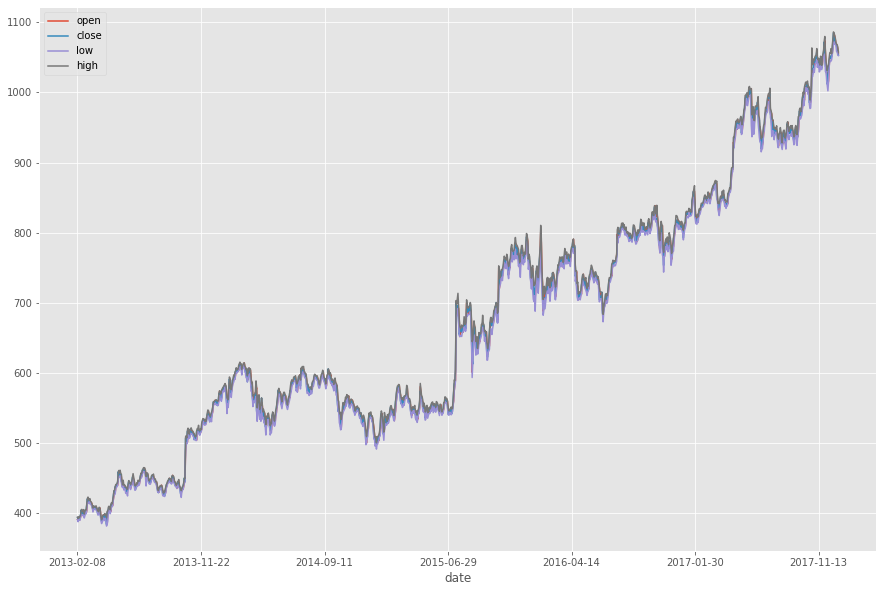

In [15]:
#graphical visualization of date over open, close, high and low stocks
df.plot(kind = 'line', x = 'date', y = ['open', 'close', 'low', 'high'])

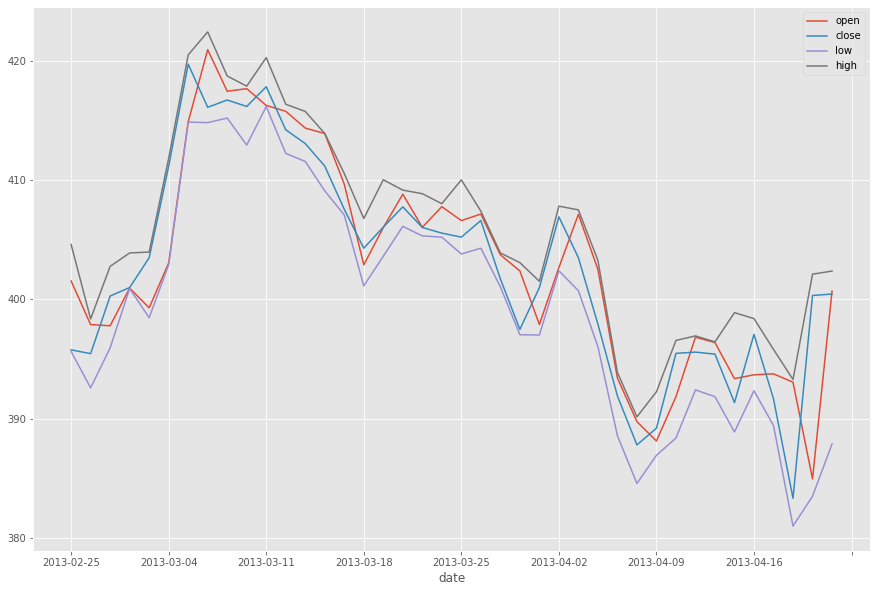

In [16]:
#graphical visualization of date over open, close, high, and low stocks (clear insights)
df[10:50].plot(kind = 'line', x = 'date', y = ['open', 'close', 'low', 'high'])

In [17]:
#graphical visualization of yearly based on open, close, high and low stocks over month
df['months'] = pd.DatetimeIndex(df['date']).month
df.head()

,date,open,high,low,close,volume,Name,year,months
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL,2013,2
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL,2013,2
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL,2013,2
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL,2013,2
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL,2013,2


In [18]:
yearly_open_Pivot = pd.pivot_table(df, values = 'open', columns = 'year', index = 'months')
yearly_close_Pivot = pd.pivot_table(df, values = 'close', columns = 'year', index = 'months')
yearly_high_Pivot = pd.pivot_table(df, values = 'high', columns = 'year', index = 'months')
yearly_low_Pivot = pd.pivot_table(df, values = 'low', columns = 'year', index = 'months')

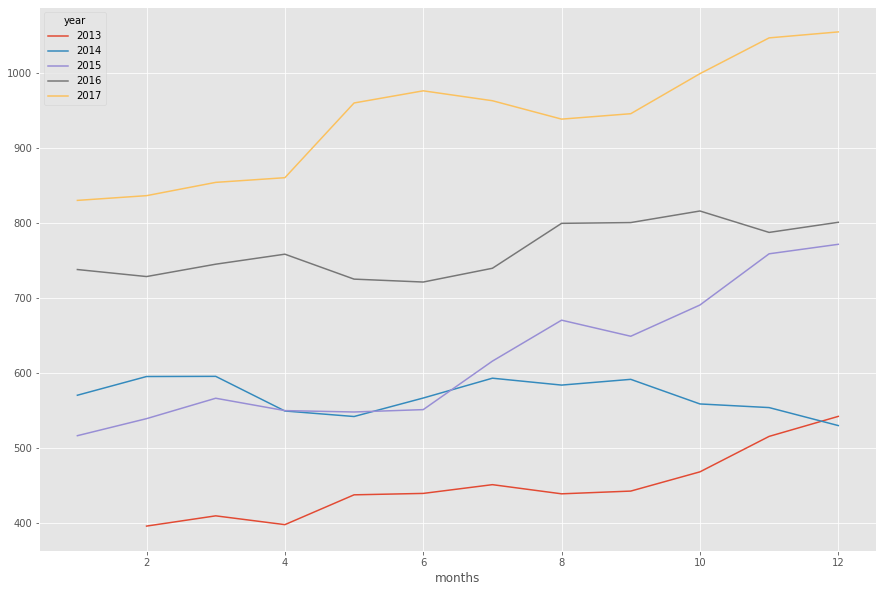

In [19]:
yearly_open_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a299795d0>,
      dtype=object)

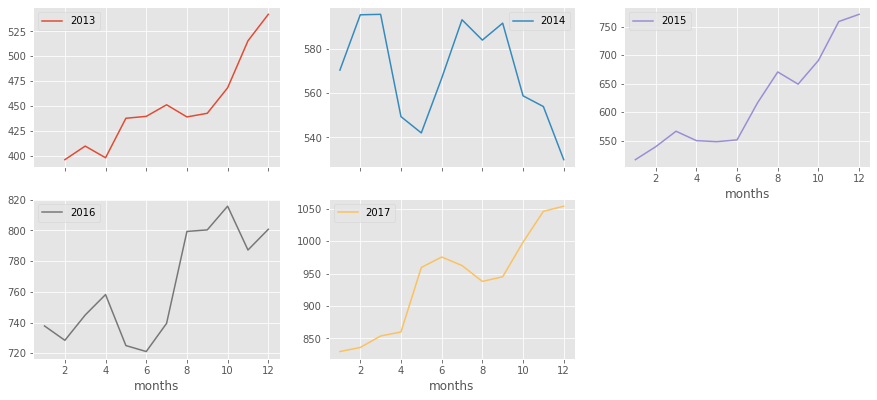

In [20]:
yearly_open_Pivot.plot(subplots = True, figsize = (15, 10), layout = (3,3))

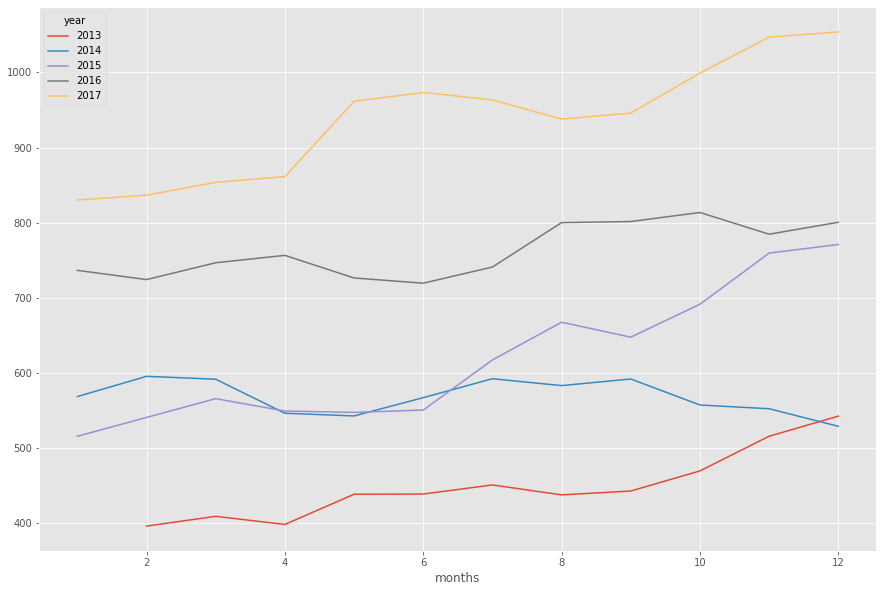

In [21]:
yearly_close_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a295cfdd0>,
      dtype=object)

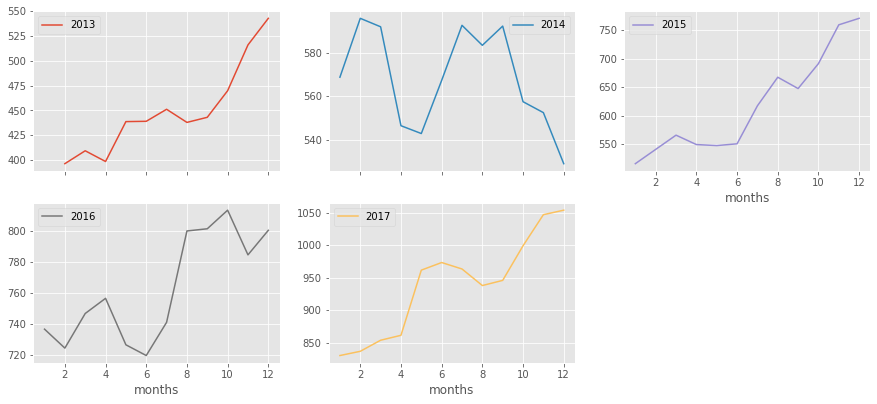

In [22]:
yearly_close_Pivot.plot(subplots = True, figsize = (15, 10), layout = (3, 3))

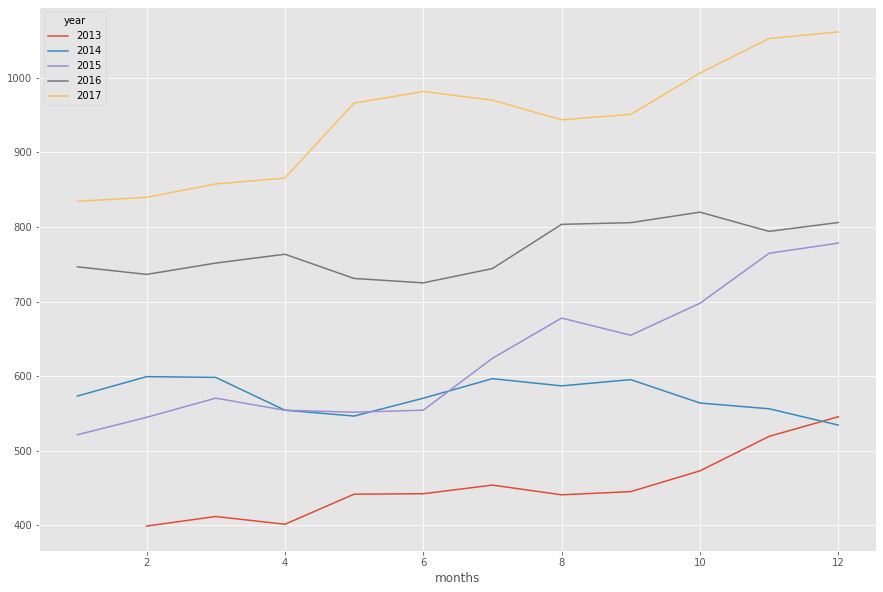

In [23]:
yearly_high_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a2927fdd0>,
      dtype=object)

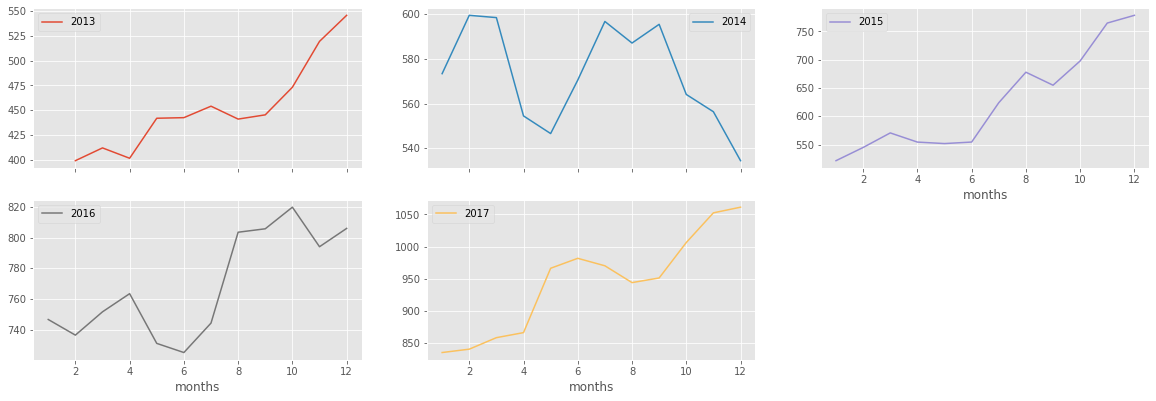

In [24]:
yearly_high_Pivot.plot(subplots = True, figsize = (20, 10), layout = (3, 3))

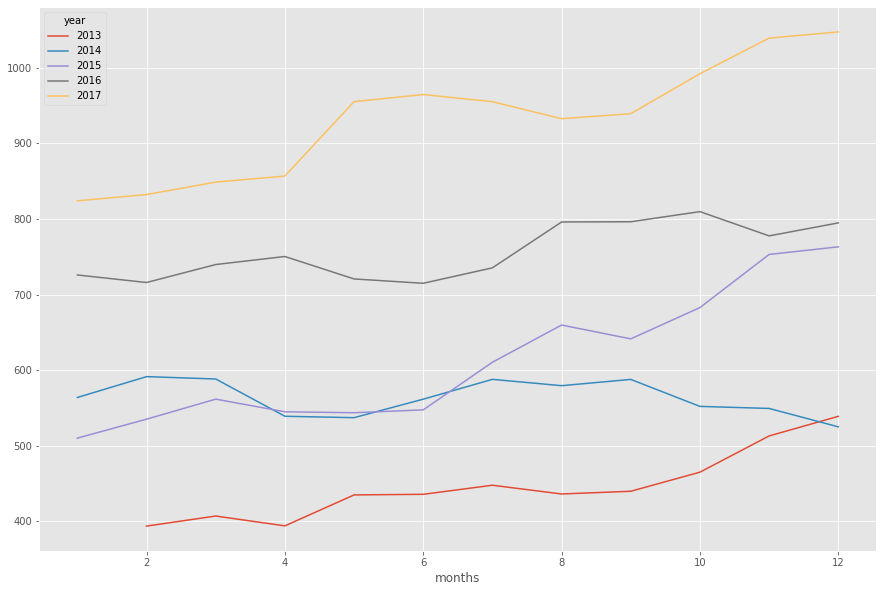

In [25]:
yearly_low_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a28e98350>,
      dtype=object)

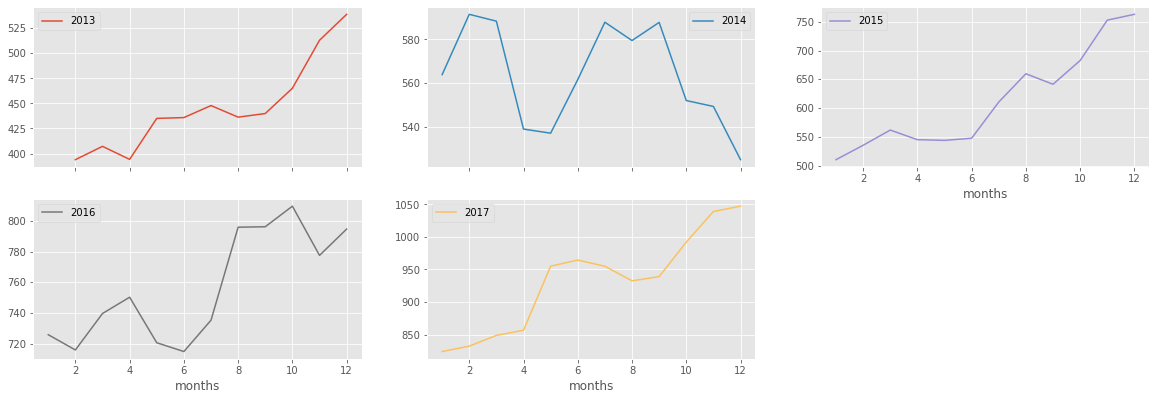

In [26]:
yearly_low_Pivot.plot(subplots = True, figsize = (20, 10), layout = (3, 3))

In [27]:
#predicting the closing price stock
df.head()

,date,open,high,low,close,volume,Name,year,months
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL,2013,2
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL,2013,2
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL,2013,2
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL,2013,2
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL,2013,2


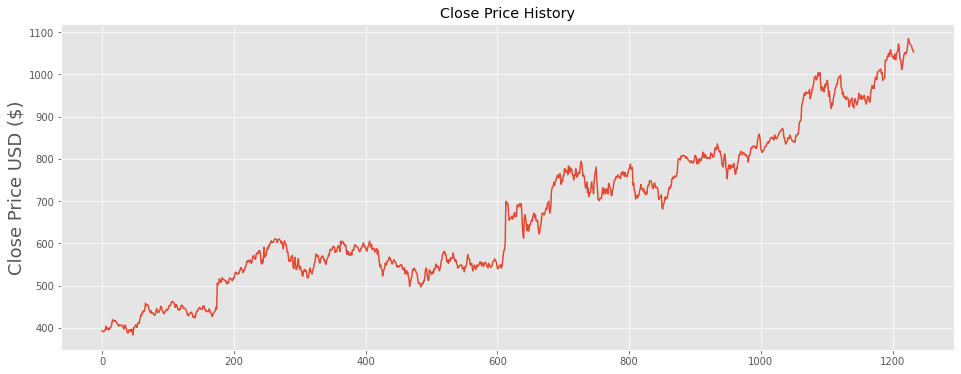

In [28]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [29]:
data = df.filter(['close'])
#convert the data to a numpy array
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .95))
training_data_len

1172

In [30]:
#scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01387631],
       [0.01177228],
       [0.01054549],
       ...,
       [0.96453153],
       [0.95847524],
       [0.95484147]])

In [31]:
#create the training dataset
train_data = scaled_data[0:int(training_data_len), :]
#split the data into x_train and y_train dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.01387631, 0.01177228, 0.01054549, 0.01208607, 0.01562366,
       0.01923962, 0.02919615, 0.01893295, 0.02112262, 0.02410388,
       0.01772768, 0.01727125, 0.02415376, 0.02516651, 0.02872547,
       0.03964774, 0.05184368, 0.04669141, 0.04755867, 0.04679131,
       0.04914485, 0.04400257, 0.04236224, 0.03967339, 0.03451115,
       0.02986662, 0.03238432, 0.03480071, 0.03234143, 0.03166398,
       0.03118603, 0.03316879, 0.02620777, 0.02016544, 0.02515939,
       0.03361097, 0.02873402, 0.02079444, 0.01222159, 0.00637321,
       0.00837022, 0.01730688, 0.01745664, 0.01721411, 0.01142287,
       0.01958204, 0.01187218, 0.        , 0.02421788, 0.02439202,
       0.02994499, 0.03390623, 0.03080086, 0.02532341, 0.03790452,
       0.04183441, 0.03888165, 0.045429  , 0.05691899, 0.06820919])]
[0.06512803705023162]

[array([0.01387631, 0.01177228, 0.01054549, 0.01208607, 0.01562366,
       0.01923962, 0.02919615, 0.01893295, 0.02112262, 0.02410388,
       0.01772768, 0.01727125, 0.02

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#train the model
history = model.fit(x_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
139/139 [==============================] - 11s 59ms/step - loss: 0.0069
Epoch 2/100
139/139 [==============================] - 8s 59ms/step - loss: 9.2785e-04
Epoch 3/100
139/139 [==============================] - 8s 59ms/step - loss: 8.4291e-04
Epoch 4/100
139/139 [==============================] - 8s 59ms/step - loss: 9.2769e-04
Epoch 5/100
139/139 [==============================] - 9s 65ms/step - loss: 7.7378e-04
Epoch 6/100
139/139 [==============================] - 8s 59ms/step - loss: 6.7913e-04
Epoch 7/100
139/139 [==============================] - 8s 59ms/step - loss: 5.9839e-04
Epoch 8/100
139/139 [==============================] - 8s 59ms/step - loss: 5.2011e-04
Epoch 9/100
139/139 [==============================] - 8s 60ms/step - loss: 5.1763e-04
Epoch 10/100
139/139 [==============================] - 8s 60ms/step - loss: 4.4113e-04
Epoch 11/100
139/139 [==============================] - 8s 60ms/step - loss: 4.3933e-04
Epoch 12/100
139/139 [======================

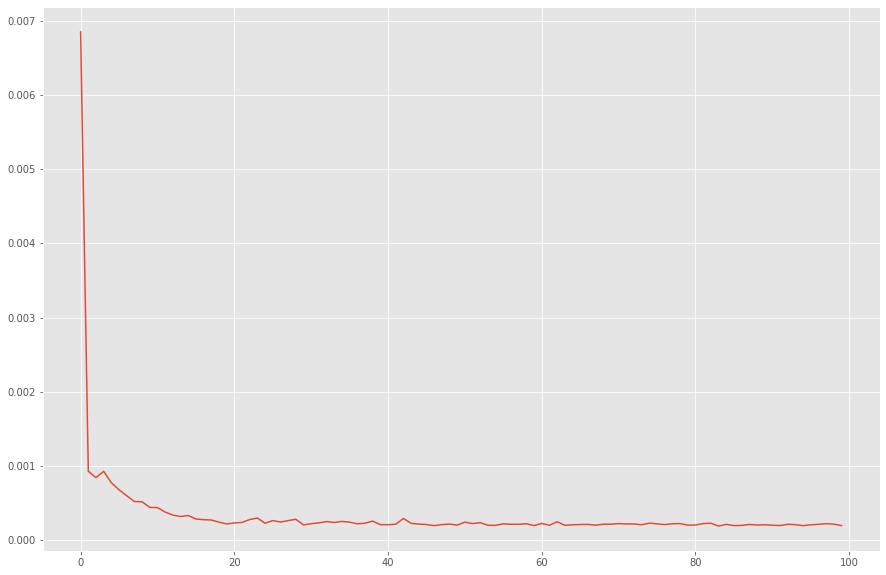

In [33]:
plt.plot(history.history['loss'])

In [34]:
#creating the test data
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#get the root mean squared error (rmse)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10.48615554930557

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


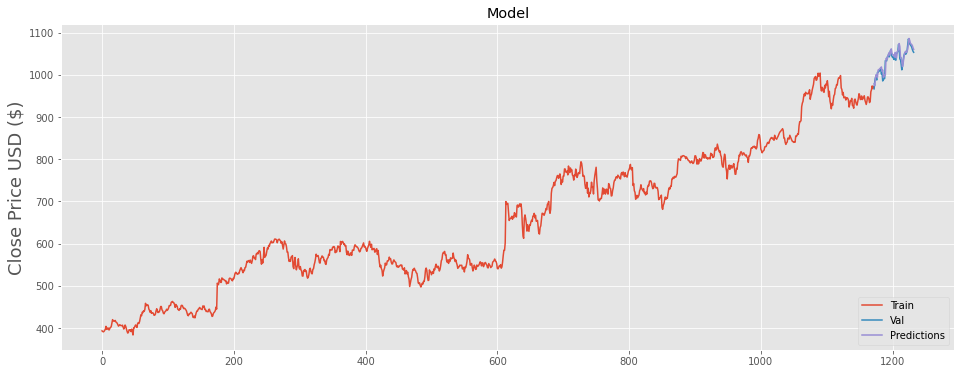

In [35]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [36]:
#show the valid and predicted prices
valid

,close,Predictions
1172,966.78,979.062683
1173,985.19,974.439697
1174,993.64,992.102844
1175,992.31,1000.676270
1176,987.80,998.806763
...,...,...
1228,1068.86,1073.152588
1229,1065.85,1071.765381
1230,1060.20,1069.246826
1231,1055.95,1064.223389
